In [198]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [206]:
#Dataset
dataset = pd.read_csv('data_gojek.csv')
x = dataset.drop(["linha", "car_or_bus","rating_weather", "rating_bus","rating","time"], axis = 1)
x.head()

,id,id_android,speed,distance
0,1,0,19.210586,2.652
1,2,0,30.848229,5.290
2,3,1,13.560101,0.918
3,4,1,19.766679,7.700
4,8,0,25.807401,3.995


In [207]:
x = driver.iloc[:, 2:4]
x.head()

,speed,distance
0,19.210586,2.652
1,30.848229,5.290
2,13.560101,0.918
3,19.766679,7.700
4,25.807401,3.995


In [208]:
x_array =  np.array(x)
print(x_array)

[[1.92105856e+01 2.65200000e+00]
 [3.08482291e+01 5.29000000e+00]
 [1.35601009e+01 9.18000000e-01]
 [1.97666790e+01 7.70000000e+00]
 [2.58074009e+01 3.99500000e+00]
 [1.34691332e+00 9.00000000e-03]
 [3.68507874e+01 8.40200000e+00]
 [1.74051313e+01 6.75000000e-01]
 [1.53954361e+01 8.11100000e+00]
 [8.90272944e+00 2.70000000e-02]
 [1.50413480e+01 3.27700000e+00]
 [1.44400981e+01 3.87200000e+00]
 [1.63567325e+01 1.26000000e+00]
 [1.75427999e+01 5.85700000e+00]
 [9.45181557e+00 2.61600000e+00]
 [9.45181557e+00 2.61600000e+00]
 [1.62635039e+01 7.33400000e+00]
 [2.12235944e+01 6.14900000e+00]
 [1.94236545e+01 4.59500000e+00]
 [2.07996291e+01 8.84900000e+00]
 [8.72437242e+00 1.69510000e+01]
 [8.72437242e+00 1.69510000e+01]
 [8.68613764e+00 4.36400000e+00]
 [5.49959473e+01 5.57700000e+01]
 [5.49959473e+01 5.57700000e+01]
 [1.26110448e+01 7.30300000e+00]
 [1.45342872e+01 1.14900000e+00]
 [1.02882267e+01 3.27600000e+00]
 [1.83281891e+01 2.40000000e+00]
 [1.71776350e+01 2.85300000e+00]
 [1.709782

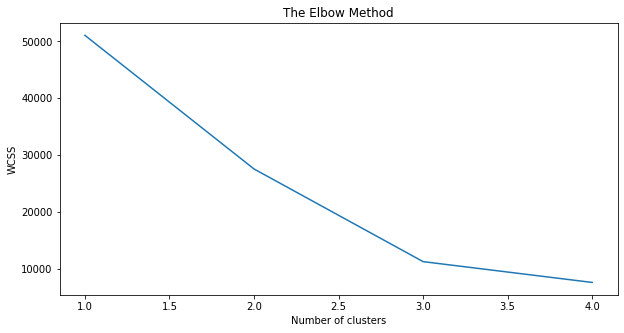

In [222]:
#menentukan K menggunakan WCSS elbow graph
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [223]:
#menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.99600362e-01, 4.75353691e-02],
       [3.20578504e-01, 9.48376338e-02],
       [1.40861225e-01, 1.64428267e-02],
       [2.05381184e-01, 1.38051606e-01],
       [2.68176999e-01, 7.16168481e-02],
       [1.39000630e-02, 1.43448869e-04],
       [3.82977592e-01, 1.50639244e-01],
       [1.80831914e-01, 1.20855673e-02],
       [1.59940297e-01, 1.45421291e-01],
       [9.24459124e-02, 4.66208826e-04],
       [1.56259404e-01, 5.87423120e-02],
       [1.50009162e-01, 6.94113217e-02],
       [1.69933373e-01, 2.25752658e-02],
       [1.82263037e-01, 1.05004572e-01],
       [9.81538910e-02, 4.68898492e-02],
       [9.81538910e-02, 4.68898492e-02],
       [1.68964223e-01, 1.31488820e-01],
       [2.20526426e-01, 1.10240456e-01],
       [2.01815302e-01, 8.23755133e-02],
       [2.16119130e-01, 1.58654450e-01],
       [9.05918170e-02, 3.03932292e-01],
       [9.05918170e-02, 3.03932292e-01],
       [9.01943506e-02, 7.82334272e-02],
       [5.71604072e-01, 1.00000000e+00],
       [5.716040

In [226]:
kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(x_scaled)
x["kluster"] = kmeans.labels_
print(x.kluster)

0      1
1      1
2      0
3      1
4      1
      ..
158    1
159    1
160    0
161    0
162    0
Name: kluster, Length: 163, dtype: int32


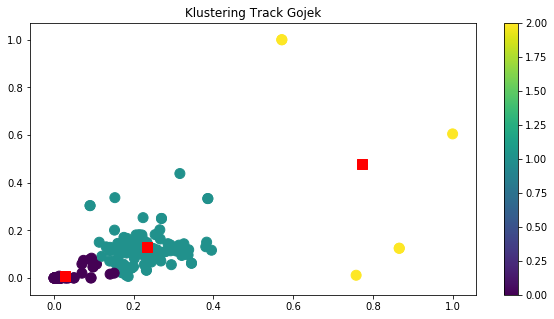

In [235]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = x.kluster, marker = "o", alpha = 1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=120, alpha=1 , marker="s");
plt.title("Klustering Track Gojek")
plt.colorbar (output)
plt.show()